In [2]:
pip install python-docx wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


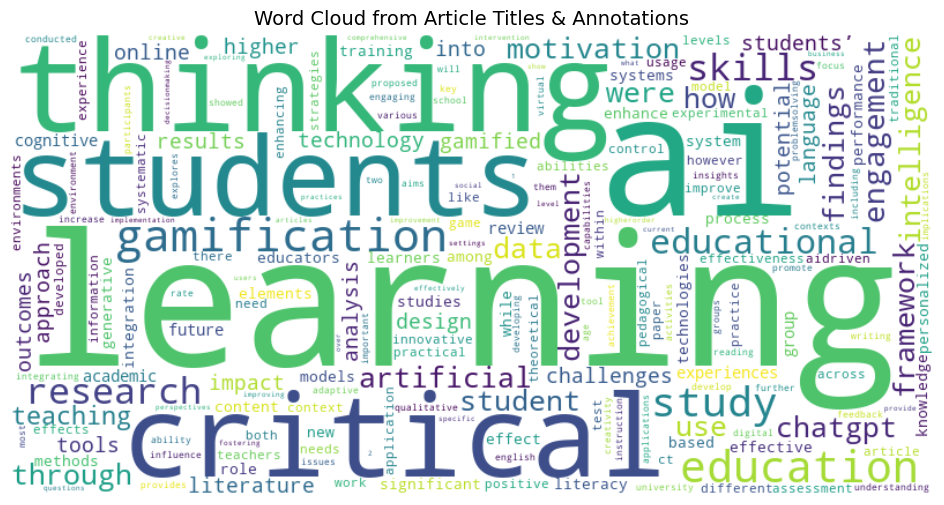

In [8]:
# Import necessary libraries
from docx import Document
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to extract text from a .docx file
def extract_text_from_docx(file_path):
    doc = Document(file_path)
    text = " ".join([para.text for para in doc.paragraphs])
    return text

# Specify the path to your .docx file
file_path = "Abstract_dataset.docx"  # Replace with the actual file path

# Extract text from the file
text = extract_text_from_docx(file_path)

# Define a list of stopwords to remove common words
custom_stopwords = set([
    "the", "and", "to", "of", "in", "a", "for", "on", "with", "as", "by", "this", 
    "is", "was", "an", "are", "that", "from", "it", "we", "at", "be", "have", 
    "not", "which", "has", "its", "can", "also", "been", "their", "but", "or", 
    "they", "such", "these", "more", "all", "some", "if", "other", "one", "may",
    "our", "between", "using", "used", "about"
])

# Clean text and remove stopwords
words = text.lower().translate(str.maketrans("", "", string.punctuation)).split()
filtered_words = [word for word in words if word not in custom_stopwords]

# Perform word frequency analysis
word_freq = Counter(filtered_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Article Titles & Annotations", fontsize=14)
plt.show()


In [26]:
pip install pandas openpyxl wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


Columns in the file: Index(['#', 'Article title', 'keywords', ' Country',
       'source (Web of Science, Scopus or other)', 'Year',
       'percentile (Q1,Q2,Q3,Q4 or other)', 'Citations:',
       'type of research (experimental, theoretical, reviews, meta-analyses)',
       'Educational levels (school, college, university, corporate training)',
       'The relationship between gamification, AI and critical thinking (“gamification + AI”, “gamification + critical thinking”)',
       'Distribution by methodologies (questionnaires, data analysis, case studies, experiments)',
       'REFERENCES (number of sources)'],
      dtype='object')


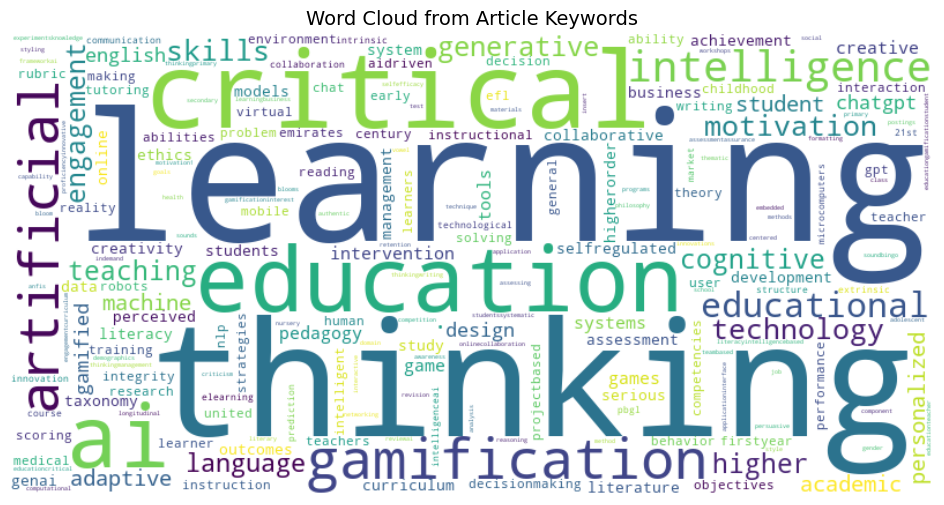

In [43]:
# Import necessary libraries
import pandas as pd
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the Excel file (replace with the correct file path)
file_path = "Article_dataset.xlsx"
df = pd.read_excel(file_path)

# Print column names to verify the structure
print("Columns in the file:", df.columns)

# Check if the 'keywords' column exists; adjust the column name if needed
if "keywords" not in df.columns:
    raise ValueError("The column 'keywords' is not found in the Excel file. Please check the column name.")

# Combine all keywords into one large text
# (Assumes that keywords in each row are separated by some delimiter like a comma or space)
text = " ".join(df["keywords"].dropna().astype(str))

# Define custom stopwords
custom_stopwords = set([
    "the", "and", "to", "of", "in", "a", "for", "on", "with", "as", "by", "this", 
    "is", "was", "an", "are", "that", "from", "it", "we", "at", "be", "have", 
    "not", "which", "has", "its", "can", "also", "been", "their", "but", "or", 
    "they", "such", "these", "more", "all", "some", "if", "other", "one", "may",
    "our", "between", "using", "used", "about"
])

# Clean the text: lowercase, remove punctuation, and filter stopwords
words = text.lower().translate(str.maketrans("", "", string.punctuation)).split()
filtered_words = [word for word in words if word not in custom_stopwords]

# Count word frequencies
word_freq = Counter(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Article Keywords", fontsize=14)
plt.show()


In [31]:
pip install pandas matplotlib openpyxl


Note: you may need to restart the kernel to use updated packages.


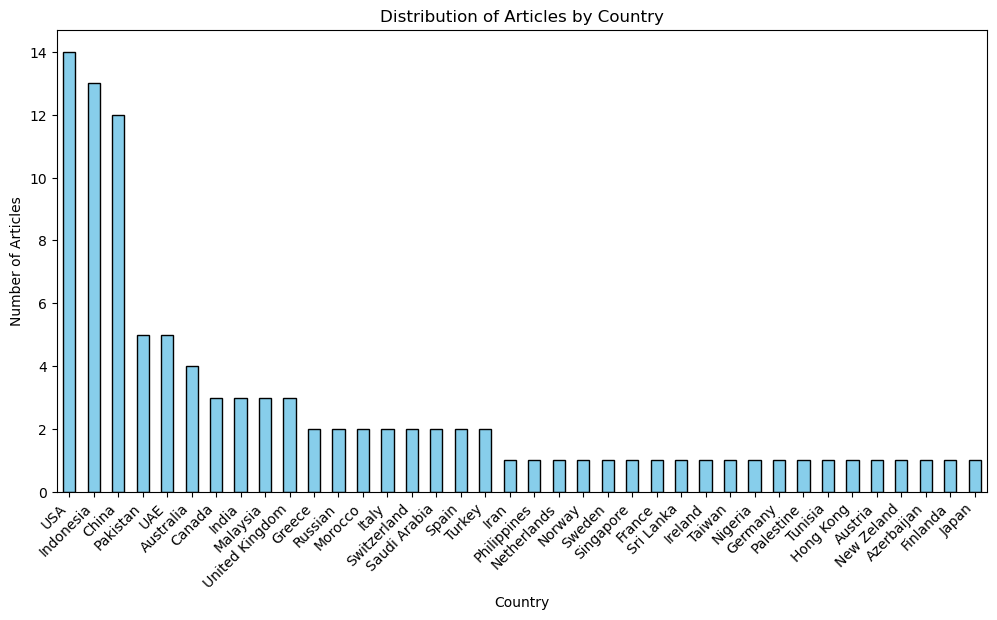

In [45]:
# Check if 'Country' column exists; adjust the column name if needed
if " Country" not in df.columns:
    raise ValueError("The column 'Country' is not found in the Excel file. Please check the column name.")

# Count the number of articles per country
country_counts = df[" Country"].dropna().value_counts()

# Plot the distribution of articles by country
plt.figure(figsize=(12, 6))
country_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Customize the plot
plt.xlabel("Country")
plt.ylabel("Number of Articles")
plt.title("Distribution of Articles by Country")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()


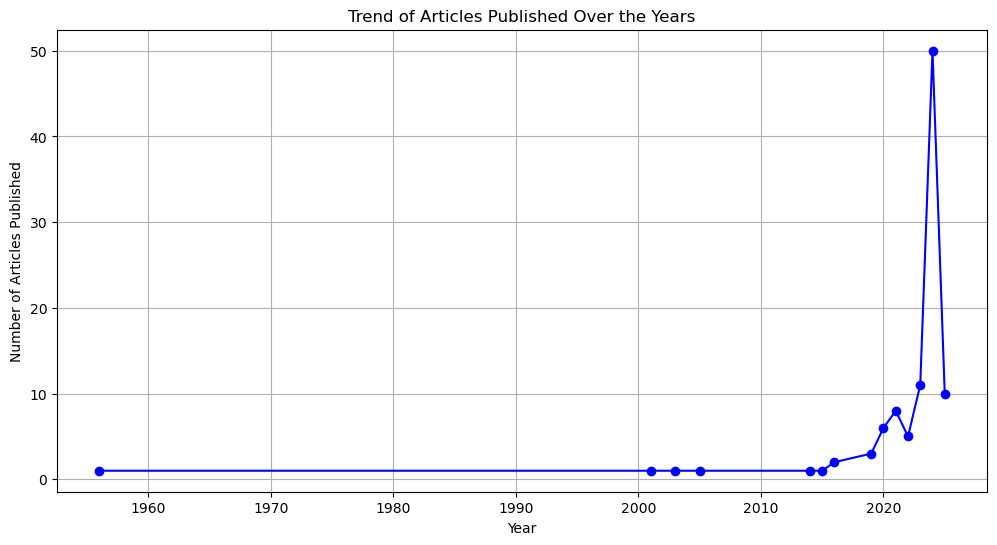

In [47]:
# Check if 'Year' column exists; adjust the column name if needed
if "Year" not in df.columns:
    raise ValueError("The column 'Year' is not found in the Excel file. Please check the column name.")

# Count the number of articles per year
year_counts = df["Year"].dropna().astype(int).value_counts().sort_index()

# Plot the trend of articles published over the years
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker="o", linestyle="-", color="b")

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Number of Articles Published")
plt.title("Trend of Articles Published Over the Years")
plt.grid(True)

# Show the plot
plt.show()


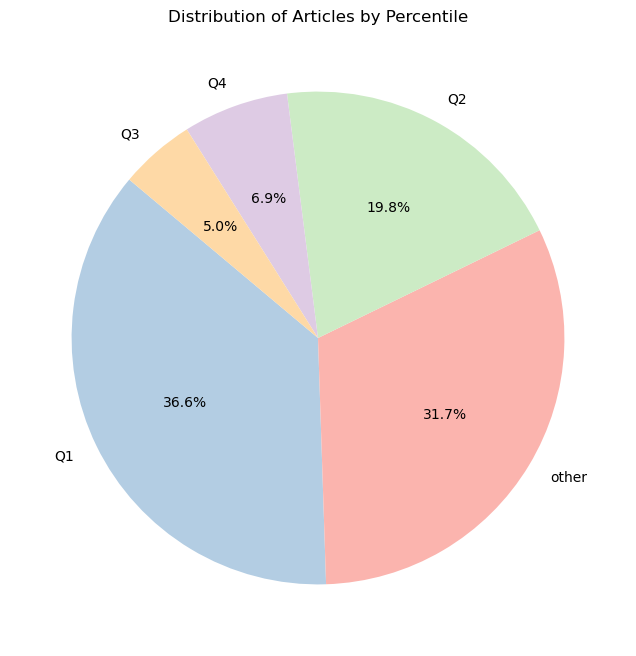

In [53]:
# Load the Excel file (replace with your actual file path)
file_path = "Article_dataset.xlsx"  # Update the file path if necessary
df = pd.read_excel(file_path)

# Check if 'percentile' column exists; adjust the column name if needed
percentile_column = "percentile (Q1,Q2,Q3,Q4 or other)"  # Adjust column name if necessary
if percentile_column not in df.columns:
    raise ValueError(f"The column '{percentile_column}' is not found in the Excel file. Please check the column name.")

# Count the number of articles per percentile category
percentile_counts = df[percentile_column].dropna().value_counts()

# Define colors with a soft color palette
colors = ["#b3cde3", "#fbb4ae", "#ccebc5", "#decbe4", "#fed9a6"]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentile_counts, labels=percentile_counts.index, autopct="%1.1f%%", colors=colors, startangle=140)

# Customize the plot
plt.title("Distribution of Articles by Percentile")

# Show the pie chart
plt.show()


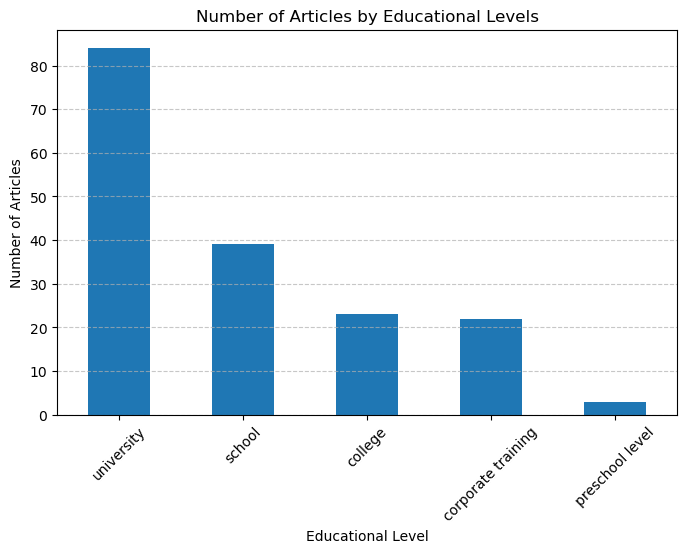

In [61]:

# Load data from file
file_path = "Article_dataset.xlsx"  # Specify file path
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Sheet1")

# Clean and process data
column_name = 'Educational levels (school, college, university, corporate training)'
df['Educational levels'] = df[column_name].str.lower().str.strip()

# Split educational levels if multiple levels are mentioned in one article
df_exploded = df.assign(EducationalLevel=df['Educational levels'].str.split(', ')).explode('EducationalLevel')

# Count the number of articles for each educational level
educational_level_counts = df_exploded['EducationalLevel'].value_counts()

# Plot the diagram
plt.figure(figsize=(8, 5))
educational_level_counts.plot(kind='bar')
plt.title("Number of Articles by Educational Levels")
plt.xlabel("Educational Level")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [67]:
pip install pandas matplotlib matplotlib-venn openpyxl


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45355 sha256=97f070ff8178a12b0b346c22407e4d79d6ddaf1b5001c3f5214d042c6a3d8253
  Stored in directory: /Users/araykassenkhan/Library/Caches/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


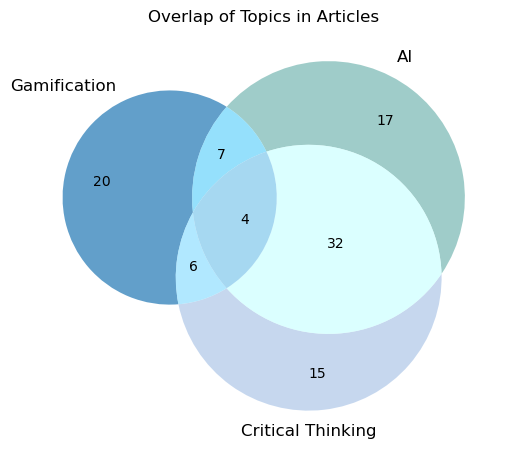

In [85]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Load the Excel file (replace with your actual file path)
file_path = "Article_dataset.xlsx"  # Update with the correct path
df = pd.read_excel(file_path)

# Define the column name (adjust if necessary)
column_name = "The relationship between gamification, AI and critical thinking (“gamification + AI”, “gamification + critical thinking”)"

# Check if the column exists
if column_name not in df.columns:
    raise ValueError(f"The column '{column_name}' is not found in the Excel file. Please check the column name.")

# Extract data from the column
data = df[column_name].dropna().astype(str)

# Create sets for each category
gamification_set = set(data[data.str.contains("gamification", case=False, na=False)].index)
ai_set = set(data[data.str.contains("AI", case=False, na=False)].index)
critical_thinking_set = set(data[data.str.contains("critical thinking", case=False, na=False)].index)

# Calculate unique and intersection counts
only_gamification = len(gamification_set - ai_set - critical_thinking_set)
only_ai = len(ai_set - gamification_set - critical_thinking_set)
only_critical_thinking = len(critical_thinking_set - gamification_set - ai_set)

gamification_ai = len(gamification_set & ai_set - critical_thinking_set)
gamification_critical_thinking = len(gamification_set & critical_thinking_set - ai_set)
ai_critical_thinking = len(ai_set & critical_thinking_set - gamification_set)

all_three = len(gamification_set & ai_set & critical_thinking_set)

# Plot the Venn diagram
plt.figure(figsize=(6, 6))
venn3(subsets=(only_gamification, only_ai, gamification_ai, only_critical_thinking, gamification_critical_thinking, ai_critical_thinking, all_three),
      set_labels=("Gamification", "AI", "Critical Thinking"),
      set_colors=("#1f77b4", "#76b7b2", "#aec7e8"),  # Different shades of blue
      alpha=0.7)  # Transparency for better visibility

# Customize the plot
plt.title("Overlap of Topics in Articles")

# Show the diagram
plt.show()
